
# Creating the season history

* Wins, losses, and ties
* Season Fixtures
* Season summary
* Goals by player
* Goals Scored x Taken

First we gather the tools that will helps us with this task

In [1]:
from grfc.game.season_history import read_raw_data, goals_by_player, raw_goals_by_player, \
     raw_scoreboard, scoreboard, results, match_results
from grfc.game import GRFC_FILE as GAMES_FILE
from pandas import DataFrame

This is the data file the system will be reading from

In [2]:
assert GAMES_FILE == 'GRFC U8.xlsx'

Get the goals for each match and present a sample, from the first round

In [3]:
read_raw_data(GAMES_FILE)[0]

,Player 2,Player 3
15,Tigers,Bonnet Bay
16,Lachlan,1
17,Oliver,1
18,Nicholas,1
19,NaN,1
20,NaN,NaN
21,NaN,NaN
22,NaN,NaN
23,NaN,NaN
24,NaN,NaN


Create the specific game data, displaying another sample from the first round

In [4]:
raw_scoreboard(read_raw_data(GAMES_FILE))[0]

,Tigers,Bonnet Bay
0,Lachlan,1
1,Oliver,1
2,Nicholas,1
3,NaN,1
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


Now, couting the goals for each side. From the first round, we can check the final score

In [5]:
scoreboard(raw_scoreboard(read_raw_data(GAMES_FILE)))[0]

Tigers        3
Bonnet Bay    4
dtype: int64

Now, we calculate all the results so far in the season, showing if it is a win, loss, or tie, present the results in a table

In [6]:
RESULTS = results(match_results(scoreboard(raw_scoreboard(read_raw_data(GAMES_FILE)))))
DataFrame(RESULTS, index=range(1, len(RESULTS)))

,Result,Goals Scored,Goals Taken,Opponent
1,win,5,2,Gymea Bay
2,tie,4,4,Marton Hammers
3,win,7,1,Engadine Eagles
4,win,6,1,Menai Hawks
5,loss,1,5,Gymea United
6,loss,2,3,8H-2
7,win,3,2,Sylvania Heights
8,loss,0,8,Heathcote Waratah
9,tie,0,0,Bonnet Bay
10,loss,0,1,Gymea United 2


And a summary of the season

In [7]:
RESULTS.groupby(by='Result')['Result'].count().plot.bar()

In [8]:
RESULTS.groupby(by='Result')['Result'].count()

Result
loss    10
tie      3
win      5
Name: Result, dtype: int64

From the raw scoreboard, we can then extract the number of goals scored by each player

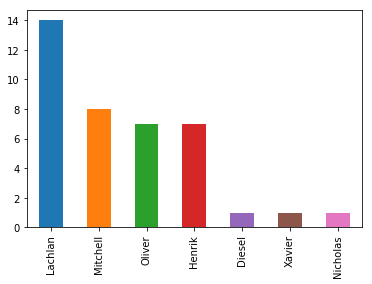

In [9]:
goals_by_player(raw_goals_by_player(raw_scoreboard(read_raw_data(GAMES_FILE)))).plot.bar()

In [10]:
goals_by_player(raw_goals_by_player(raw_scoreboard(read_raw_data(GAMES_FILE))))

Lachlan     14
Mitchell     8
Oliver       7
Henrik       7
Diesel       1
Xavier       1
Nicholas     1
Name: Tigers, dtype: int64

Finally, the total goals scored and taken by the Tigers

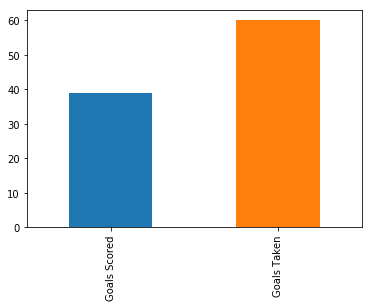

In [11]:
RESULTS[['Goals Scored', 'Goals Taken']].sum().plot.bar()

In [12]:
RESULTS.sum()

Result          losswintiewinwinlosslosswinlosstielosslossloss...
Goals Scored                                                   39
Goals Taken                                                    60
dtype: object